# **_Introduction_**

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
# %pip install --upgrade plotly

## **_Import Statements_**

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## **_Notebook Presentation_**

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## **_Load the Data_**

#### **_Make file retrieval process more robust w/`os` stuff:_**

In [ ]:
import os

In [ ]:
curr_dir = os.getcwd()
data_dir = os.path.join(curr_dir, 'data')

data_dir

In [ ]:
enc = 'windows-1252'

hh_income_csv_path = os.path.join(data_dir, "Median_Household_Income_2015.csv")
df_hh_income = pd.read_csv(hh_income_csv_path, encoding=enc)

pct_poverty_csv_path = os.path.join(data_dir, "Pct_People_Below_Poverty_Level.csv")
df_pct_poverty = pd.read_csv(pct_poverty_csv_path, encoding=enc)

pct_completed_hs_csv_path = os.path.join(data_dir, "Pct_Over_25_Completed_High_School.csv")
df_pct_completed_hs = pd.read_csv(pct_completed_hs_csv_path, encoding=enc)

share_race_city_csv_path = os.path.join(data_dir, "Share_of_Race_By_City.csv")
df_share_race_city = pd.read_csv(share_race_city_csv_path, encoding=enc)

fatalities_csv_path = os.path.join(data_dir, "Deaths_by_Police_US.csv")
df_fatalities = pd.read_csv(fatalities_csv_path, encoding=enc)


---
---

# **_Preliminary Data Exploration_**

* What is the shape of the DataFrames? 

In [ ]:
print(f"`df_hh_income` shape: {df_hh_income.shape}")
print(f"`df_pct_poverty` shape: {df_pct_poverty.shape}")
print(f"`df_pct_completed_hs` shape: {df_pct_completed_hs.shape}")
print(f"`df_share_race_city` shape: {df_share_race_city.shape}")
print(f"`df_fatalities` shape: {df_fatalities.shape}")

---

* How many rows and columns do they have?

In [ ]:
df_hh_income_columns, df_hh_income_rows = df_hh_income.shape
print(f"df_hh_income cols: {df_hh_income_columns}")
print(f"df_hh_income rows: {df_hh_income_rows}\n")

df_pct_poverty_columns, df_pct_poverty_rows = df_pct_poverty.shape
print(f"df_pct_poverty cols: {df_pct_poverty_columns}")
print(f"df_pct_poverty rows: {df_pct_poverty_rows}\n")

df_pct_completed_hs_columns, df_pct_completed_hs_rows = df_pct_completed_hs.shape
print(f"df_pct_completed_hs cols: {df_pct_completed_hs_columns}")
print(f"df_pct_completed_hs rows: {df_pct_completed_hs_rows}\n")

df_share_race_city_columns, df_share_race_city_rows = df_share_race_city.shape
print(f"df_share_race_city cols: {df_share_race_city_columns}")
print(f"df_share_race_city rows: {df_share_race_city_rows}\n")

df_fatalities_columns, df_fatalities_rows = df_fatalities.shape
print(f"df_fatalities cols: {df_fatalities_columns}")
print(f"df_fatalities rows: {df_fatalities_rows}\n")


#### **_Analysis:_**

The first four DFs have similar number of rows.

The second and third DFs have the exact same number of rows.

The first three have the same number of columns.

The last has many fewer rows, but more columns.

---

* What are the column names?

In [ ]:
def format_col_names(dataframe):
    col_list = dataframe.columns
    col_name_str = ", ".join(col_list)
    return col_name_str

In [ ]:
df_hh_income_cols = format_col_names(df_hh_income)
print(f"`df_hh_income` col names: {df_hh_income_cols}\n")

df_pct_poverty_cols = format_col_names(df_pct_poverty)
print(f"`df_pct_poverty` col names: {df_pct_poverty_cols}\n")

df_pct_completed_hs_cols = format_col_names(df_pct_completed_hs)
print(f"`df_pct_completed_hs` col names: {df_pct_completed_hs_cols}\n")

df_share_race_city_cols = format_col_names(df_share_race_city)
print(f"`df_share_race_city` col names: {df_share_race_city_cols}\n")

df_fatalities_cols = format_col_names(df_fatalities)
print(f"`df_fatalities` col names: {df_fatalities_cols}\n")


---

* Are there any NaN values or duplicates?

In [ ]:
print(f"`NaN` info for `df_hh_income`: {df_hh_income.isna().sum()}\n")
print(f"Duplicate # for `df_hh_income`: {df_hh_income.duplicated().sum()}\n")

In [ ]:
print(f"`NaN` info for `df_pct_poverty`: {df_pct_poverty.isna().sum()}\n")
print(f"Duplicate # for `df_pct_poverty`: {df_pct_poverty.duplicated().sum()}\n")

In [ ]:
print(f"`NaN` info for `df_pct_completed_hs`: {df_pct_completed_hs.isna().sum()}\n")
print(f"Duplicate # for `df_pct_completed_hs`: {df_pct_completed_hs.duplicated().sum()}\n")

In [ ]:
print(f"`NaN` info for `df_share_race_city`: {df_share_race_city.isna().sum()}\n")
print(f"Duplicate # for `df_share_race_city`: {df_share_race_city.duplicated().sum()}\n")

In [ ]:
print(f"`NaN` info for `df_fatalities`: {df_fatalities.isna().sum()}\n")
print(f"Duplicate # for `df_fatalities`: {df_fatalities.duplicated().sum()}\n")

#### **_Analysis:_**

df_hh_income and df_fatalities have NaN issues.

None of the DFs have duplicates.

---

## **_Data Cleaning - Check for Missing Values and Duplicates_**

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [ ]:
# Before fixing NaNs:
df_hh_income.isna().sum()

In [ ]:
df_hh_income['Median Income'] = df_hh_income['Median Income'].fillna(0)

In [ ]:
# After fixing NaNs:
df_hh_income.isna().sum()

---

In [ ]:
# Before fixing NaNs:
df_fatalities.isna().sum()

In [ ]:
df_fatalities['armed'] = df_fatalities['armed'].fillna(0)
df_fatalities['age'] = df_fatalities['age'].fillna(0)
df_fatalities['race'] = df_fatalities['race'].fillna(0)
df_fatalities['flee'] = df_fatalities['flee'].fillna(0)

In [ ]:
# After fixing NaNs:
df_fatalities.isna().sum()

#### **_Analysis:_**

All `NaN`s handled.

No duplicates to be handled.

---
---

# **_Chart the Poverty Rate in each US State_**

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_hh_income
df_pct_poverty
df_pct_completed_hs
df_share_race_city
df_fatalities

##### **_Check data types for column `poverty_rate`:_**

In [ ]:
df_pct_poverty.dtypes

##### **_Check all strings are numbers:_**

In [ ]:
for i in df_pct_poverty.poverty_rate:
    print(i)

##### **_Some values are `-`, let's replace them with `0`:_**

In [ ]:
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].replace("-", "0")

##### **_Convert that column from str/object to numeric/int:_**

In [ ]:
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"])

##### **_Remove rows w/0 (no data):_**

In [ ]:
df_pct_poverty = df_pct_poverty[df_pct_poverty["poverty_rate"] != 0]

##### **_Two ways to aggregate data:_**

In [ ]:
df_pov_state = df_pct_poverty.groupby("Geographic Area")["poverty_rate"].mean().reset_index()

# Or:
# df_pov_state = df_pct_poverty.groupby("Geographic Area").agg({"poverty_rate": 'mean'}).reset_index()

##### **_Sort and reset indices:_**

In [ ]:
df_pov_state.sort_values(by="poverty_rate", inplace=True, ascending=False)
df_pov_state.reset_index(inplace=True, drop=True)

##### **_Verify the new DF:_**

In [ ]:
df_pov_state

##### **_Colors I like for a white background:_**

In [ ]:
seaborn_palettes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']

In [ ]:
from matplotlib import colormaps
all_palettes = list(colormaps) + seaborn_palettes

In [ ]:
pov_states = df_pov_state["Geographic Area"]
pov_rate = df_pov_state["poverty_rate"]

In [ ]:
from random import choice, choices

##### **_w/Seaborn:_**

In [ ]:
# Initialize MatPlotLib figure
fig, ax = plt.subplots(figsize=(17, 7))

palette = choice(seaborn_palettes)

# Plot the months/counts:
# sns.barplot(x=pov_states, y=pov_rate, hue=pov_states, palette=palette, legend='auto')
sns.barplot(
    df_pov_state,
    x="Geographic Area",
    y="poverty_rate",
    hue="Geographic Area",
    palette=palette,
)

plt.xlabel("States", size=14, weight='bold')
plt.ylabel("Poverty Rate (pct.)", size=14, weight='bold')

plt.title(f"Poverty Rates: US States\n(color palette: {palette})",
          size=20,
          weight='bold')

plt.show()

In [ ]:
colors = ["blue", "navy", "peru",
          "black", "brown", "green",
          "olive", "indigo", "maroon",
          "purple", "sienna", "crimson",
          "darkred", "dimgray", "darkblue",
          "darkcyan", "deeppink", "seagreen",
          "chocolate", "darkgreen", "darkkhaki",
          "firebrick", "goldenrod", "limegreen",
          "olivedrab", "palegreen", "rosybrown",
          "royalblue", "slateblue", "steelblue",
          "darkorange", "darkorchid", "darksalmon",
          "darkviolet", "dodgerblue", "lightgreen",
          "mediumblue", "sandybrown", "darkmagenta",
          "forestgreen", "greenyellow", "saddlebrown",
          "springgreen", "yellowgreen", "darkseagreen",
          "midnightblue", "darkgoldenrod", "darkslateblue",
          "darkslategray", "darkslategrey", "darkturquoise",
          "rebeccapurple", "cornflowerblue", "darkolivegreen",
          "mediumseagreen", "mediumslateblue", "mediumspringgreen"]

In [ ]:
bar_colors = choices(colors, k=len(df_pov_state))

In [ ]:
# Create labels for legend:
state_rate = zip(pov_states, pov_rate)
labels_state_rate = [f"{state}: {round(rate, 2)}%" for state, rate in state_rate]

##### **_w/Matplotlib and descriptive legend:_**

In [ ]:
fig, ax = plt.subplots(figsize=(17, 11))

ax.bar(x=pov_states,
       height=pov_rate,
       label=labels_state_rate,
       color=bar_colors,
       width=0.5)

ax.set_title("Poverty Rates: US States", fontsize=36, weight='bold')
ax.set_xlabel("States", fontsize=18)
ax.set_ylabel("Poverty Rate Percentage", fontsize=18)

plt.legend(ncol=2,
           title="State: Poverty Rate",
           fontsize='medium',
           bbox_to_anchor=(1.05, 1))

plt.xticks(rotation=90)

plt.show()

#### **_Analysis:_**

In [ ]:
df_pov_state.describe()

Which state has the highest poverty rate? 

- Mississippi (MS): $26.88\%$

Which state has the lowest poverty rate?

- New Jersey (NJ): $8.16\%$

Middling:

- Indiana (IN): $15.5\%$

---

# **_Chart the High School Graduation Rate by US State_**

Show the High School Graduation Rate in ascending order of US States.

Which state has the lowest high school graduation rate?

Which state has the highest?

### **_Do the exact same as above:_**

#### **_Clean/aggregate new dataframe:_**

In [ ]:
df_pct_completed_hs.columns

In [ ]:
df_pct_completed_hs.dtypes

In [ ]:
for i in df_pct_completed_hs.percent_completed_hs:
    print(i)

In [ ]:
df_pct_completed_hs["percent_completed_hs"] = df_pct_completed_hs["percent_completed_hs"].replace("-", "0")

In [ ]:
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"])

In [ ]:
df_pct_completed_hs = df_pct_completed_hs[df_pct_completed_hs["percent_completed_hs"] != 0]

In [ ]:
df_pct_completed_hs

In [ ]:
df_hs_state = df_pct_completed_hs.groupby("Geographic Area")["percent_completed_hs"].mean().reset_index()

# Or:
# df_hs_state = df_pct_completed_hs.groupby("Geographic Area").agg({"percent_completed_hs": 'mean'}).reset_index()

In [ ]:
df_hs_state
# df_pct_completed_hs
# percent_completed_hs


In [ ]:
df_hs_state.sort_values(by="percent_completed_hs", inplace=True, ascending=True)
df_hs_state.reset_index(inplace=True, drop=True)

In [ ]:
df_hs_state

#### **_Plot:_**

In [ ]:
colors = ["blue", "navy", "peru",
          "black", "brown", "green",
          "olive", "indigo", "maroon",
          "purple", "sienna", "crimson",
          "darkred", "dimgray", "darkblue",
          "darkcyan", "deeppink", "seagreen",
          "chocolate", "darkgreen", "darkkhaki",
          "firebrick", "goldenrod", "limegreen",
          "olivedrab", "palegreen", "rosybrown",
          "royalblue", "slateblue", "steelblue",
          "darkorange", "darkorchid", "darksalmon",
          "darkviolet", "dodgerblue", "lightgreen",
          "mediumblue", "sandybrown", "darkmagenta",
          "forestgreen", "greenyellow", "saddlebrown",
          "springgreen", "yellowgreen", "darkseagreen",
          "midnightblue", "darkgoldenrod", "darkslateblue",
          "darkslategray", "darkslategrey", "darkturquoise",
          "rebeccapurple", "cornflowerblue", "darkolivegreen",
          "mediumseagreen", "mediumslateblue", "mediumspringgreen"]

In [ ]:
states = df_hs_state["Geographic Area"]

grad = df_hs_state["percent_completed_hs"]

# Create labels for legend:
state_grad = zip(states, grad)
labels_state_grad = [f"{state}: {round(grad, 2)}%" for state, grad in state_grad]

In [ ]:
fig, ax = plt.subplots(figsize=(17, 11))

bar_colors = choices(colors, k=len(df_hs_state))

ax.bar(x=states,
       height=grad,
       label=labels_state_grad,
       color=bar_colors,
       width=0.5)

ax.set_title("High School Graduation Rate:\nUS States", fontsize=36, weight='bold')
ax.set_xlabel("States", fontsize=18)
ax.set_ylabel("High School Graduation Rate", fontsize=18)

plt.legend(ncol=2,
           title="State: HS Grad Rate",
           fontsize='medium',
           bbox_to_anchor=(1.05, 1))

plt.xticks(rotation=90)

plt.show()

In [ ]:
df_pov_state.describe()

#### **_Analysis:_**

Which state has the lowest high school graduation rate?

- Texas (TX): $76.77\%$

Which state has the highest?

- Massachusetts (MA): $92.4\%$

Middle:

- Ohio (OH): $88.34\%$

---
---

#### **_Create DF with poverty and high school data merged on State names:_**

In [ ]:
df_state_hs_poverty = df_hs_state.merge(df_pov_state, on='Geographic Area')

In [ ]:
df_state_hs_poverty

In [ ]:
colors = [
    "black", "blue", "brown", "chocolate", "cornflowerblue", "crimson", "darkblue",
    "darkcyan", "darkgoldenrod", "darkgreen", "darkkhaki", "darkmagenta", "darkolivegreen",
    "darkorange", "darkorchid", "darkred", "darksalmon", "darkseagreen", "darkslateblue",
    "darkslategray", "darkslategrey", "darkturquoise", "darkviolet", "deeppink", "dimgray",
    "dodgerblue", "firebrick", "forestgreen", "goldenrod", "green", "greenyellow", "indigo",
    "lightgreen", "limegreen", "maroon", "mediumblue", "mediumseagreen", "mediumslateblue",
    "mediumspringgreen", "midnightblue", "navy", "olive", "olivedrab", "palegreen", "peru",
    "purple", "rebeccapurple", "rosybrown", "royalblue", "saddlebrown", "sandybrown",
    "seagreen", "sienna", "slateblue", "springgreen", "steelblue", "yellowgreen"
]

linestyles = ['-', ':', '-', ':']

#### **_Inspect date:_**

In [ ]:
for i in range(len(df_state_hs_poverty)):
    state = df_state_hs_poverty['Geographic Area'][i]
    print(state)
    state_grad_rate = df_state_hs_poverty['percent_completed_hs'][i]
    print(state_grad_rate)
    state_pov_rate = df_state_hs_poverty['poverty_rate'][i]
    print(state_pov_rate)

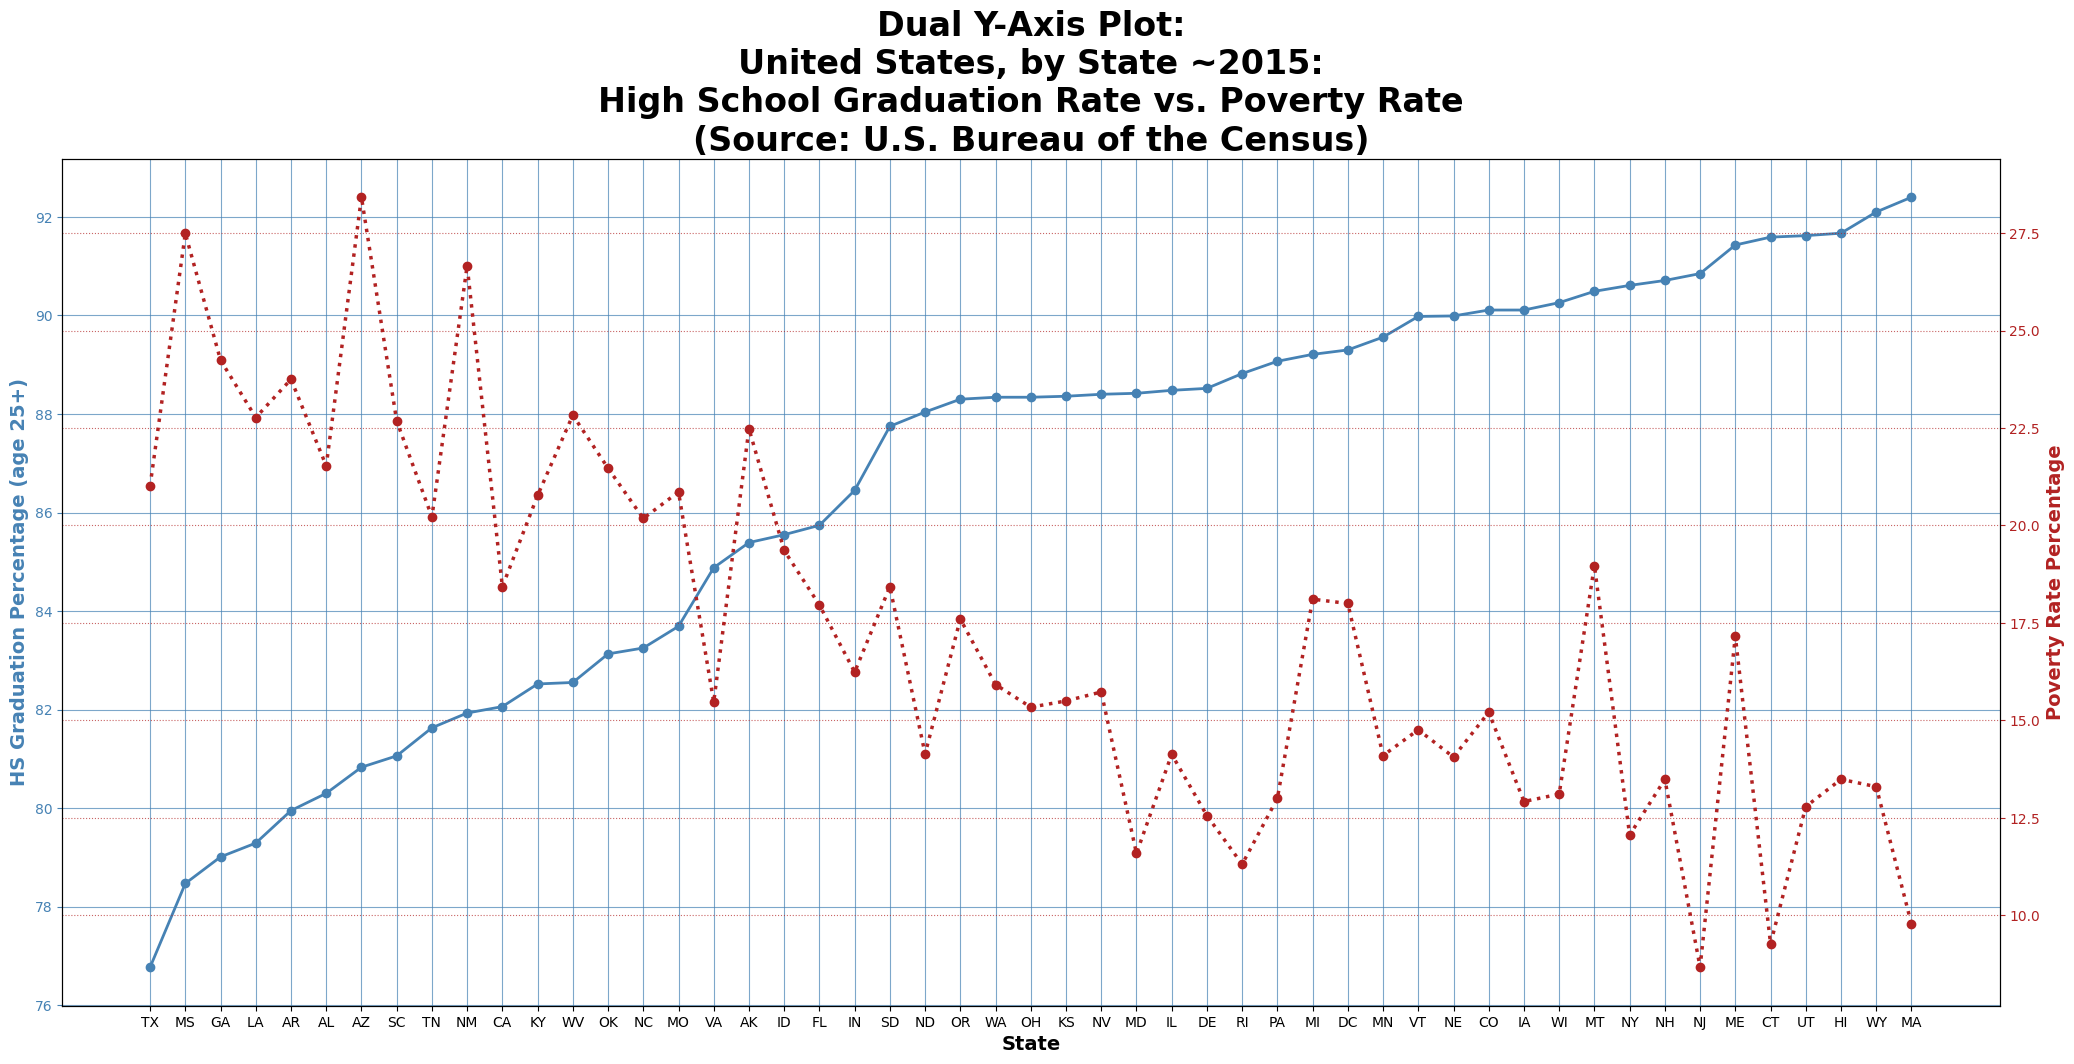

In [323]:
# Create axes:
fig, ax1 = plt.subplots(figsize=(25, 11))
ax2 = ax1.twinx()

# Extract data from DataFrame:
states = df_state_hs_poverty['Geographic Area']
state_grad_rates = np.round(df_state_hs_poverty['percent_completed_hs'], 2)
state_pov_rates = np.round(df_state_hs_poverty['poverty_rate'], 2)

# Axes colors (find good complements):
ax1_color = 'steelblue'
ax2_color = 'firebrick'

# Plot left y-axis, Graduation Rate:
ax1.plot(states,
         state_grad_rates,
         label=f"{states}: {state_grad_rates}",
         linewidth=2,
         linestyle='-',
         marker='o',
         color=ax1_color)

# Plot right y-axis, Poverty Rate:         
ax2.plot(states,
         state_pov_rates,
         label=f"{states}: {state_pov_rates}",
         linewidth=2.5,
         linestyle=':',
         marker='o',
         color=ax2_color)

# Make a title:
title = "Dual Y-Axis Plot:\n"
title += "United States, by State ~2015:\n"
title += "High School Graduation Rate vs. Poverty Rate\n"
title += "(Source: U.S. Bureau of the Census)"
ax1.set_title(title, fontsize=24, weight='bold')


# Make x-axis label:
ax1.set_xlabel("State", fontsize=14, weight='bold')

# Make y-axes labels:
ax1.set_ylabel("HS Graduation Percentage (age 25+)",
                fontsize=14,
                weight='bold')

ax2.set_ylabel("Poverty Rate Percentage",
               fontsize=14,
               weight='bold')

# Customize each axes grid for ease of plot visualization:
ax1.grid(color=ax1_color, linestyle='-', alpha=0.7)
ax1.yaxis.label.set_color(ax1_color)
ax1.tick_params(axis='y', colors=ax1_color)

ax2.grid(color=ax2_color, linestyle=':', alpha=0.7)
ax2.yaxis.label.set_color(ax2_color)
ax2.tick_params(axis='y', colors=ax2_color)

# Show the thing:
plt.show()

# **_Visualise the Relationship between Poverty Rates and High School Graduation Rates_**

#### Create a line chart with two y-axes to show if the ratio of poverty and high school graduation move together.  

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

#### **_Analysis:_**

---
---

# **_Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State_**

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [ ]:
df_hh_income
df_pct_poverty
df_pct_completed_hs
df_share_race_city
df_fatalities

#### **_Analysis:_**

---
---

# **_Create Donut Chart by of People Killed by Race_**

Hint: Use `.value_counts()`

#### **_Analysis:_**

---
---

# **_Create a Chart Comparing the Total Number of Deaths of Men and Women_**

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

#### **_Analysis:_**

---
---

# **_Create a Box Plot Showing the Age and Manner of Death_**

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

#### **_Analysis:_**

---
---

# **_Were People Armed?_**

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

#### **_Analysis:_**

---
---

# **_How Old Were the People Killed?_**

Work out what percentage of people killed were under 25 years old.  

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

#### **_Analysis:_**

---
---

# **_Race of People Killed_**

Create a chart that shows the total number of people killed by race. 

#### **_Analysis:_**

---
---

# **_Mental Illness and Police Killings_**

What percentage of people killed by police have been diagnosed with a mental illness?

#### **_Analysis:_**

---

# **_In Which Cities Do the Most Police Killings Take Place?_**

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

#### **_Analysis:_**

---

# **_Rate of Death by Race_**

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

#### **_Analysis:_**

---

# **_Create a Choropleth Map of Police Killings by US State_**

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

#### **_Analysis:_**

---

# **_Number of Police Killings Over Time_**

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

#### **_Analysis:_**

---

# **_Epilogue_**

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

#### **_Analysis and Conclusion:_**